# Amit Anand 
### 4th Sem
### DSE B

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [2]:
df = pd.read_csv('diabetes.csv')

/tmp/ipykernel_43296/2473496740.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 3, j + 1)


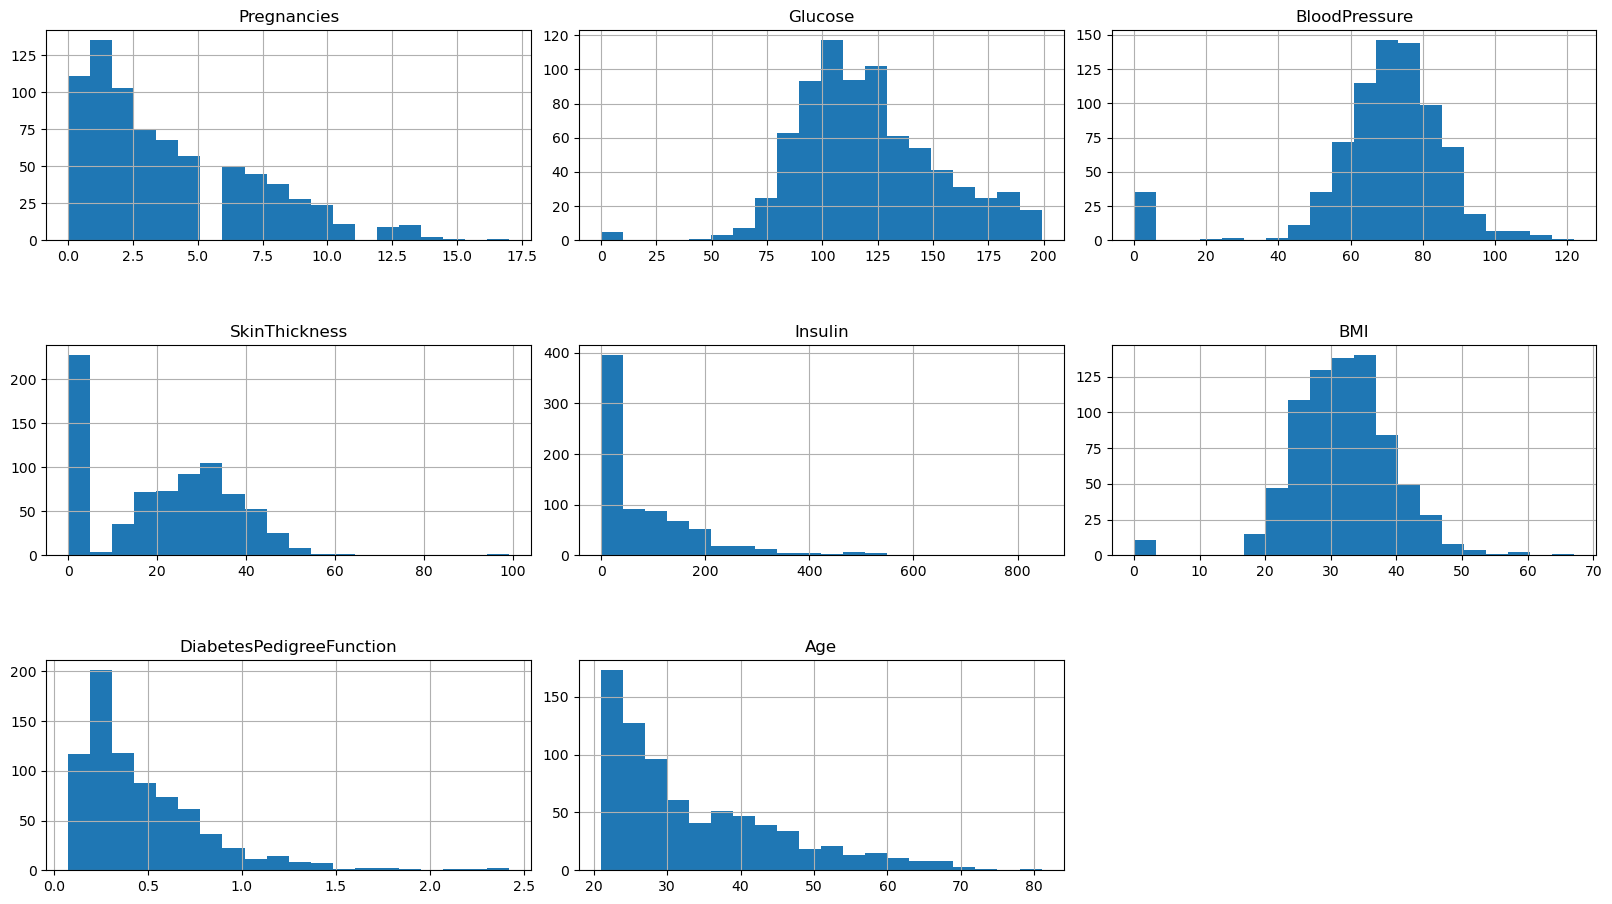

In [8]:
import itertools

col = df.columns[:8]
plt.subplots(figsize = (20, 15))
length = 8

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot(4, 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    df[i].hist(bins = 20)
    plt.title(i)
plt.show()

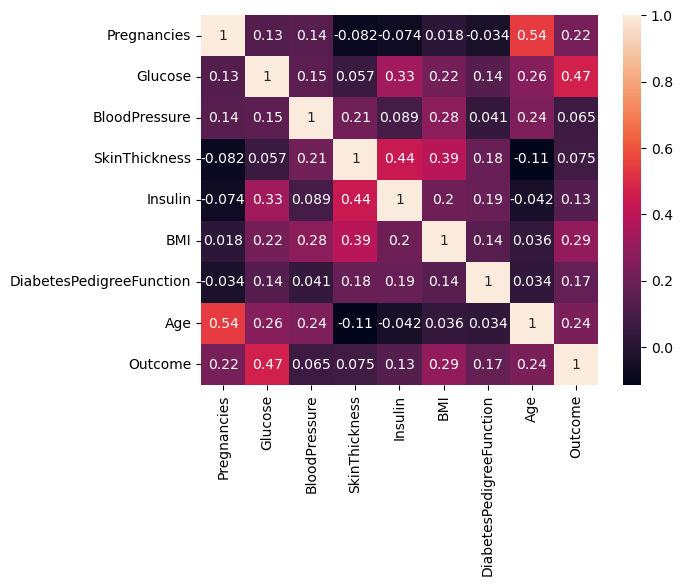

In [9]:
sns.heatmap(df.corr(), annot = True)
plt.show()

In [10]:
sc = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = sc.fit_transform(df)
dataset_scaled = pd.DataFrame(dataset_scaled)
dataset_scaled.columns=df.columns

In [11]:
dataset_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0


# Simple Logistic Regression

In [12]:
X = dataset_scaled[['Glucose']]
Y = dataset_scaled['Outcome']

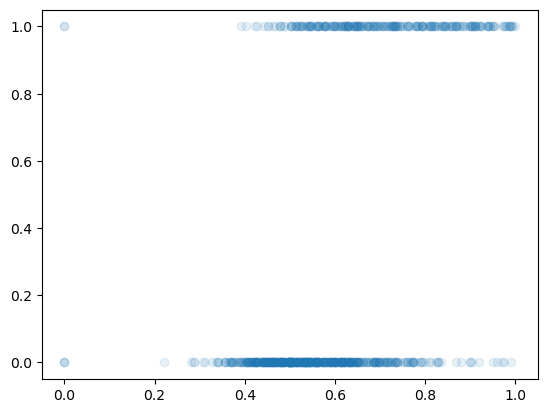

In [13]:
plt.scatter(X,Y,alpha=0.1)

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = df['Outcome'] )

In [15]:
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [16]:
Y_pred = logreg.predict(X_test)

In [17]:
accuracy = accuracy_score(Y_test, Y_pred)

In [18]:
print("Accuracy: " + str(accuracy * 100))

Accuracy: 69.48051948051948


In [19]:
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[88, 12],
       [35, 19]])

<Axes: >

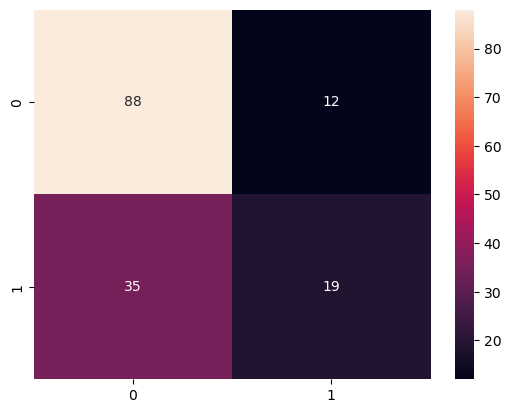

In [20]:
sns.heatmap(pd.DataFrame(cm), annot=True)

In [21]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.72      0.88      0.79       100
         1.0       0.61      0.35      0.45        54

    accuracy                           0.69       154
   macro avg       0.66      0.62      0.62       154
weighted avg       0.68      0.69      0.67       154



# Multinomial/Multivariate Logistic Regression

In [22]:
X = dataset_scaled[['Glucose','Insulin','Age','BMI']]
Y = dataset_scaled['Outcome']

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = df['Outcome'] )

In [24]:
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [25]:
Y_pred = logreg.predict(X_test)

In [26]:
accuracy = accuracy_score(Y_test, Y_pred)

In [27]:
print("Accuracy: " + str(accuracy * 100))

Accuracy: 72.07792207792207


In [28]:
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[86, 14],
       [29, 25]])

<Axes: >

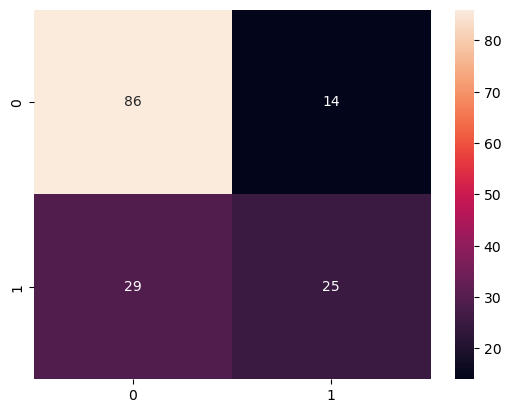

In [29]:
sns.heatmap(pd.DataFrame(cm), annot=True)

In [30]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.86      0.80       100
         1.0       0.64      0.46      0.54        54

    accuracy                           0.72       154
   macro avg       0.69      0.66      0.67       154
weighted avg       0.71      0.72      0.71       154

